In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.Chirps_Second.quantile(0.75)

17.15

In [ ]:
iqr = df.Chirps_Second.quantile(0.75) - df.Chirps_Second.quantile(0.25)
upper_threshold = df.Chirps_Second.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps_Second.quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold

(12.9, 19.699999999999996)

In [ ]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(15, 2)

In [ ]:
df.dtypes

Chirps_Second         float64
Ground_Temperature    float64
dtype: object

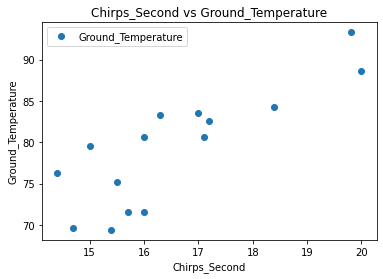

In [ ]:
df.plot(x='Chirps_Second', y='Ground_Temperature', style='o')

plt.title('Chirps_Second vs Ground_Temperature')

plt.xlabel('Chirps_Second')
plt.ylabel('Ground_Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


This shows us that there is a linear relationship between Chirps_Second and Ground_Temperature. 
There is no requirement of Transformation.

In [ ]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [ ]:
X = df.loc[:, ['Chirps_Second']].values
Y = df.loc[:, 'Ground_Temperature'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
X_test

array([[15.7],
       [14.7],
       [19.8],
       [16.3]])

In [ ]:
Y_test

array([71.6, 69.7, 93.3, 83.3])

In [ ]:
X_train.shape, X_test.shape

((11, 1), (4, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

34.469811320754715


In [ ]:
print(regressor.coef_)

[2.7095169]


In [ ]:
regressor.predict([[15]])

array([75.11256479])

### predicted Ground_temperature = (34.46)* Chirps_Second + 2.709 




In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred

array([77.00922662, 74.29970972, 88.11824591, 78.63493676])

In [ ]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_pred})
df1

,Actual,Predicted
0,71.6,77.009227
1,69.7,74.299710
2,93.3,88.118246
3,83.3,78.634937


In [ ]:
regressor.predict([[12]]) # perils of extrapolation

array([66.9840141])

In [ ]:
from sklearn import metrics

In [ ]:
regressor.score(X_test,Y_test)

0.7274347449027714

In [ ]:
# The R squared value is 0.727 which is a moderate positive  correlation

In [ ]:
# Extrapolating the data
X1 = df.loc[:, ['Ground_Temperature']].values
Y1 = df.loc[:, 'Chirps_Second'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25)

In [ ]:
X1_test

array([[80.6],
       [79.6],
       [84.3],
       [69.4]])

In [ ]:
Y1_test

array([16. , 15. , 18.4, 15.4])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X1_train, Y1_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

-0.2597973833656404


In [ ]:
print(regressor.coef_)

[0.21289258]


In [ ]:
Y1_pred = regressor.predict(X1_test)
Y1_pred

array([16.89934487, 16.68645229, 17.68704743, 14.51494793])

In [ ]:
df2 = pd.DataFrame({'Actual': Y1_test, 'Predicted':Y1_pred})
df2

,Actual,Predicted
0,16.0,16.899345
1,15.0,16.686452
2,18.4,17.687047
3,15.4,14.514948


In [ ]:
regressor.predict([[95]])

array([19.96499808])

In [ ]:
from sklearn import metrics
regressor.score(X1_test,Y1_test)

0.28957456205308196

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.shape

(62, 2)

In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(62, 2)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr) 
upper_threshold, lower_threshold

(119.60625, -70.80375000000001)

In [ ]:
df.Brain = df.Brain.clip(-70,119)

In [ ]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_threshold = df.Body.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Body.quantile(0.25) - (1.5 * iqr) 
upper_threshold, lower_threshold

(408.625, -238.375)

In [ ]:
df.Body = df.Body.clip(-238,408)

In [ ]:
df.shape

(62, 2)

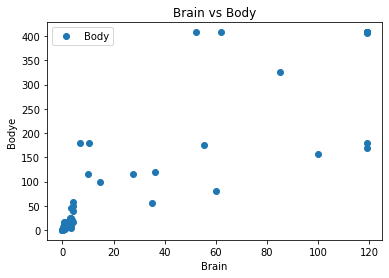

In [ ]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')

plt.xlabel('Brain')
plt.ylabel('Bodye')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.888422
Body,0.888422,1.000000


In [ ]:
x = df.loc[:, ['Brain']].values
y = df.loc[:, 'Body'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape

((46, 1), (16, 1))

In [ ]:
x_test

array([[1.190e+02],
       [2.300e-02],
       [5.550e+01],
       [4.250e-01],
       [1.190e+02],
       [1.410e+00],
       [3.000e+00],
       [1.483e+01],
       [1.040e+00],
       [2.300e-02],
       [7.850e-01],
       [1.190e+02],
       [6.000e+01],
       [4.288e+00],
       [1.190e+02],
       [1.190e+02]])

In [ ]:
y_test

array([4.08e+02, 4.00e-01, 1.75e+02, 6.40e+00, 4.08e+02, 1.75e+01,
       2.50e+01, 9.82e+01, 5.50e+00, 3.00e-01, 3.50e+00, 1.80e+02,
       8.10e+01, 3.92e+01, 4.06e+02, 4.08e+02])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

22.1067496738399


In [ ]:
print(regressor.coef_)

[3.00538605]


### predicted body weight = (3.005)*Brain weight + 22.106 

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([379.74768923,  22.17587355, 188.90567526,  23.38403874,
       379.74768923,  26.344344  ,  31.12290781,  66.67662475,
        25.23235116,  22.17587355,  24.46597772, 379.74768923,
       202.42991247,  34.99384504, 379.74768923, 379.74768923])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,408.0,379.747689
1,0.4,22.175874
2,175.0,188.905675
3,6.4,23.384039
4,408.0,379.747689
5,17.5,26.344344
6,25.0,31.122908
7,98.2,66.676625
8,5.5,25.232351
9,0.3,22.175874


In [ ]:
regressor.predict([[180]])

array([563.07623807])

In [ ]:
from sklearn import metrics
regressor.score(x_test,y_test)

0.85660231490787

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
iqr = df['Sex'].quantile(0.75) - df['Sex'].quantile(0.25)
upper_threshold = df['Sex'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Sex'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(2.5, -1.5)

In [ ]:
df.Sex = df.Sex.clip(-1.5, 2.5)

In [ ]:
iqr = df['Rank'].quantile(0.75) - df['Rank'].quantile(0.25)
upper_threshold = df['Rank'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Rank'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(6.0, -2.0)

In [ ]:
df.Rank = df.Rank.clip(-2.0, 6.0)

In [ ]:
iqr = df['Year'].quantile(0.75) - df['Year'].quantile(0.25)
upper_threshold = df['Year'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Year'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(23.0, -9.0)

In [ ]:
df.Year = df.Year.clip(-9.0, 23.0)

In [ ]:
iqr = df['Degree'].quantile(0.75) - df['Degree'].quantile(0.25)
upper_threshold = df['Degree'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Degree'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(2.5, -1.5)

In [ ]:
df.Degree = df.Degree.clip(-1.5, 2.5)

In [ ]:
iqr = df['YSdeg'].quantile(0.75) - df['YSdeg'].quantile(0.25)
upper_threshold = df['YSdeg'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['YSdeg'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(48.0, -18.0)

In [ ]:
df.YSdeg = df.YSdeg.clip(-18.0, 48.0)

In [ ]:
df.shape

(52, 6)

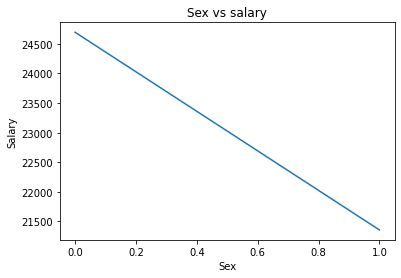

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

In [ ]:
# We see that there is a very less negative coorrelation between sex and salary.
# So SEX is not a factor in salary

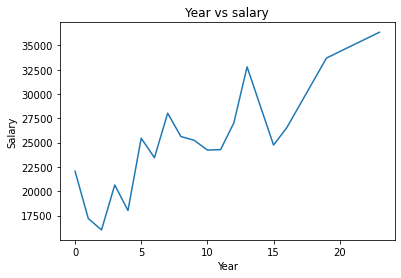

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


In [ ]:
df.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

In [ ]:
# We see that there is a  linear relatioship between Year and Salary and there is no neeed for transformation.

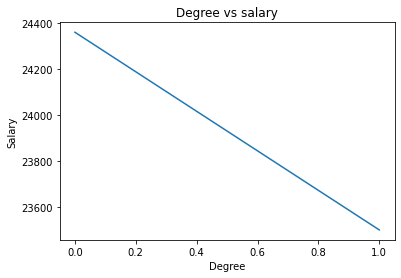

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

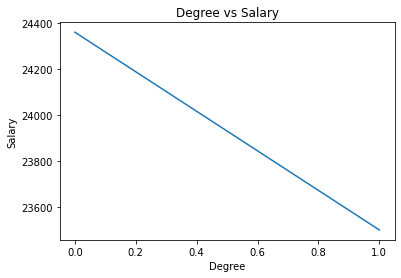

,transformed_degree,Salary
transformed_degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
# Let us try transformation of the degree
df['transformed_degree'] = np.power(df['Degree'],2)
df.groupby('transformed_degree')['Salary'].mean().plot()

plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

df[['transformed_degree','Salary']].corr()

In [ ]:
# Even after transformation, there is no improvement. But the problem statement has asked us touse all the 5 features, so we are not dropping this feature.

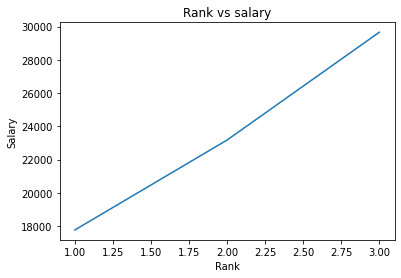

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

In [ ]:
# We see that there is a  linear relationship between Rank and Salary and there is no neeed for transformation.

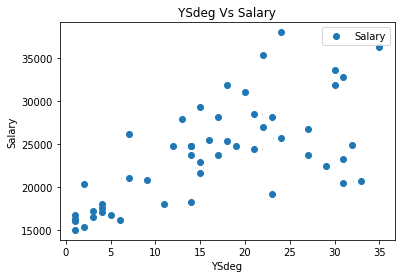

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg', y = 'Salary', style = 'o')
plt.title('YSdeg Vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

In [ ]:
x = df.loc[:,['Sex','Rank','Degree','Year','YSdeg']].values
y = df.loc[:, 'Salary'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# SCALING
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#  MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex','Rank','Degree','Year','YSdeg'], columns = ['coefficient'])
y_pred = regressor.predict(x_test_scaled)
coeff_df

,coefficient
Sex,341.680749
Rank,3894.113143
Degree,-504.988199
Year,2615.010001
YSdeg,-448.989849


In [ ]:
regressor.predict(scaler.transform(np.array([[1,3,24,1,34]])))


array([258.63782764])

In [ ]:
regressor.intercept_

24098.63888888889

### predicted salary = 341*(Scaled_Sex) + 3894.11*(Scaled_Rank) + (-504)*(Scaled_Degree) + 2615*(Scaled_Year) + (-448.98)*(Scaled_YSdeg) + 24098.63

In [ ]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

,Actual,Predicted
0,32850,30587.551187
1,31850,30633.541180
2,20850,20225.870786
3,17095,17259.017949
4,20525,23590.585459
5,20300,16192.664955
6,17600,17259.017949
7,23300,25015.646555
8,18304,19440.947952
9,24800,24746.124470


In [124]:
from sklearn import metrics
regressor.score(x_test,y_test)

-11.818524130599966

In [ ]:
# Year is considered to be the best feature to predict the Salary